In [1]:
import os
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from sccoda.util import comp_ana as mod
from sccoda.util import cell_composition_data as dat
from sccoda.util import data_visualization as viz

import sccoda.datasets as scd

import scanpy as sc
import pertpy as pt


os.chdir('/root/host_home')

2024-05-22 15:12:30.597263: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Filenames

In [2]:
adata_input = 'hp_NPCs/processed_data/hp_NPC_clustered_scvi_cuda_soup.h5ad'

In [3]:
if not os.path.exists('hp_NPCs/figures/Composition'):
    # Create a new directory because it does not exist
    os.mkdir('hp_NPCs/figures/Composition')
    print("The new directory: 'hp_NPCs/figures/Composition' is created!")
else: 
    print("The directory 'hp_NPCs/figures/Composition' already exists")


The directory 'hp_NPCs/figures/Composition' already exists


# Read in data

In [4]:
adata = sc.read(adata_input)

In [5]:
adata

AnnData object with n_obs × n_vars = 30557 × 16774
    obs: 'lane', 'Demux_state', 'Donor', 'cell_types', 'condition', 'age', 'years_of_illness', 'deltaHY', 'deltaUPDRS', 'deltaADL', 'deltaDOPA', 'gender', 'cultivation_period', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'batch', 'size_factors', 'S_score', 'G2M_score', 'phase', '_scvi_batch', '_scvi_labels', 'Ferroptosis_pos_corr', 'Ferroptosis_neg_corr', 'Apoptosis_pos_corr', 'Apoptosis_neg_corr', 'Necroptosis_pos_corr', 'Autophagy_pos_corr', 'Pathanatos_pos_corr', 'cell_types_abbrev'
    var: 'gene_ids', 'feature_types', 'genome', 'gene_symbols', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_co

In [6]:
pd.crosstab(adata.obs['condition'], adata.obs['Donor'])

Donor,UKERi1JF-R1-018,UKERiG3G-R1-039,UKERi1E4-R1-003,UKERiO3H-R1-005,UKERi82A-R1-002,UKERiJ2C-R1-015,UKERiM89-R1-005,UKERiC99-R1-007,UKERiR66-R1-007,UKERiAY6-R1-003,UKERiPX7-R1-001,UKERi88H-R1-002
condition,,,,,,,,,,,,
Control,1394,3232,3446,2746,852,0,0,0,0,0,0,0
Parkinson,0,0,0,0,0,2163,1034,4582,2693,2979,2157,3279


# Compositional analysis - cell_types

## Build model

In [7]:
sccoda_model = pt.tl.Sccoda()
sccoda_data = sccoda_model.load(
    adata,
    type="cell_level",
    generate_sample_level=True,
    cell_type_identifier="cell_types",
    sample_identifier="Donor",
    covariate_obs=["condition"],
)
sccoda_data

MuData object with n_obs × n_vars = 30569 × 16783
  var:	'n_cells'
  2 modalities
    rna:	30557 x 16774
      obs:	'lane', 'Demux_state', 'Donor', 'cell_types', 'condition', 'age', 'years_of_illness', 'deltaHY', 'deltaUPDRS', 'deltaADL', 'deltaDOPA', 'gender', 'cultivation_period', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'batch', 'size_factors', 'S_score', 'G2M_score', 'phase', '_scvi_batch', '_scvi_labels', 'Ferroptosis_pos_corr', 'Ferroptosis_neg_corr', 'Apoptosis_pos_corr', 'Apoptosis_neg_corr', 'Necroptosis_pos_corr', 'Autophagy_pos_corr', 'Pathanatos_pos_corr', 'cell_types_abbrev'
      var:	'gene_ids', 'feature_types', 'genome', 'gene_symbols', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_genes', 'highly_variable_nbatches', 'highly_variable_intersection', 'highly_variable_genes_batch_aware'
      uns:	'Donor_colors', '_scvi_manager_uuid', '_scvi_uuid', 'cell_types_abbrev_colors', 'cell_types_colors', 'condition_colors', 'gender_colors', 'hvg', 'lane_colors', 'neighbors', 'neighbors_CC', 'neighbors_noCC', 'pca', 'phase_colors', 'umap'
      obsm:	'X_pca', 'X_scVI_CC', 'X_scVI_noCC', 'X_umap', 'X_umap_CC', 'X_umap_noCC', '_scvi_extra_continuous_covs'
      varm:	'PCs'
      layers:	'counts', 'log1p_norm', 'scran_normalization', 'soupX_counts'
      obsp:	'connectivities', 'connectivities_CC', 'connectivities_noCC', 'distances', 'distances_CC', 'distances_noCC'
    coda:	12 x 9
      obs:	'Demux_state', 'condition', 'age', 'gender', 'cultivation_period', '_scvi_batch', '_scvi_labels'
      var:	'n_cells'

In [8]:
sccoda_data.mod['coda'].obs['Donor'] = sccoda_data.mod['coda'].obs_names

In [9]:
sccoda_data.mod['coda'].obs

,Demux_state,condition,age,gender,cultivation_period,_scvi_batch,_scvi_labels,Donor
Donor,,,,,,,,
UKERi1JF-R1-018,SNG,Control,42.0,M,hp,1,0,UKERi1JF-R1-018
UKERiG3G-R1-039,SNG,Control,69.0,F,hp,6,0,UKERiG3G-R1-039
UKERi1E4-R1-003,SNG,Control,53.0,M,hp,0,0,UKERi1E4-R1-003
UKERiO3H-R1-005,SNG,Control,71.0,M,hp,9,0,UKERiO3H-R1-005
UKERi82A-R1-002,SNG,Control,66.0,F,hp,2,0,UKERi82A-R1-002
UKERiJ2C-R1-015,SNG,Parkinson,73.0,M,hp,7,0,UKERiJ2C-R1-015
UKERiM89-R1-005,SNG,Parkinson,64.0,M,hp,8,0,UKERiM89-R1-005
UKERiC99-R1-007,SNG,Parkinson,68.0,M,hp,5,0,UKERiC99-R1-007
UKERiR66-R1-007,SNG,Parkinson,54.0,M,hp,11,0,UKERiR66-R1-007


## Visualize distribution

/usr/local/lib/python3.10/dist-packages/pertpy/tools/_coda/_base_coda.py:1711: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cell_types, rotation=90)


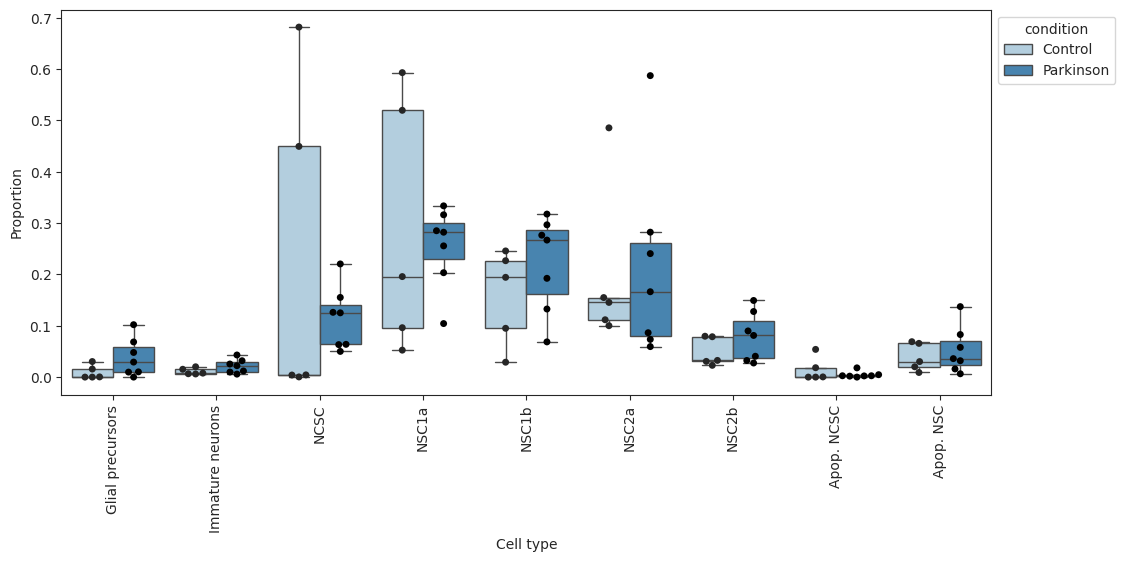

In [10]:
#Show an overview about cell type distributions across conditions as boxplot
pt.pl.coda.boxplots(
    sccoda_data,
    modality_key="coda",
    feature_name="condition",
    figsize=(12, 5),
    add_dots=True,
    plot_facets = False
)
plt.savefig('hp_NPCs/figures/Composition/celltype_composition.pdf', bbox_inches='tight')
plt.show()

In [11]:
col6 = adata.uns['cell_types_colors']

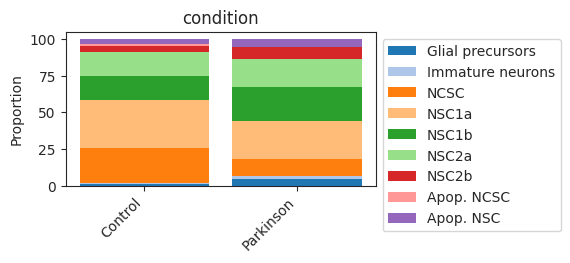

In [12]:
#Show an overview about cell type distributions across conditions as stacked barplot
pt.pl.coda.stacked_barplot(
    sccoda_data, modality_key="coda", feature_name="condition", figsize=(4, 2)
)
plt.show()

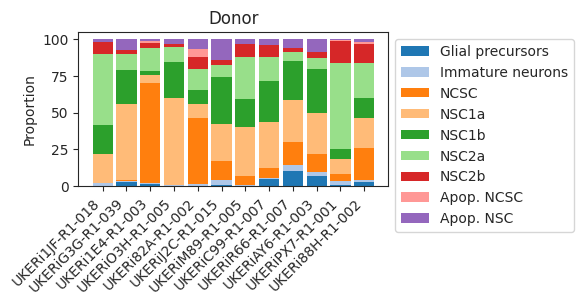

In [13]:
#Show an overview about cell type distributions across conditions as stacked barplot
pt.pl.coda.stacked_barplot(
    sccoda_data, modality_key="coda", feature_name="Donor", figsize=(4, 2)
)
plt.show()

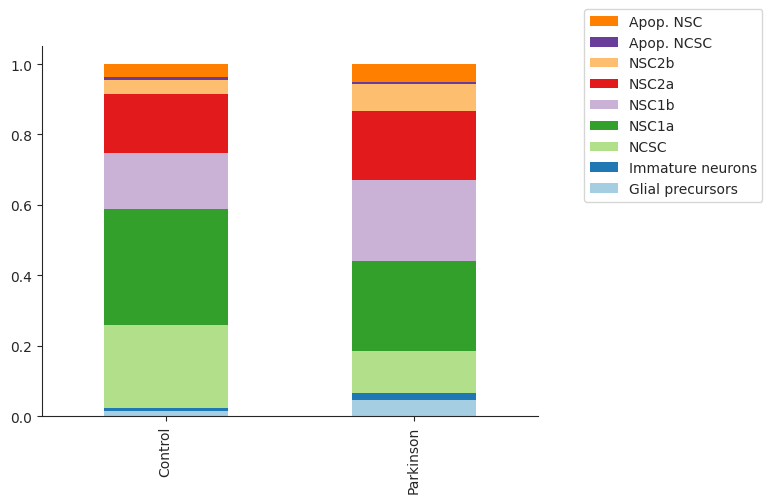

In [14]:
ax = pd.crosstab(adata.obs['condition'], adata.obs['cell_types'], normalize=0).plot(kind='bar', stacked=True, legend=False, color=col6, edgecolor='none')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.08,1.12,0,0), ncol=1)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.xlabel('')
plt.savefig('hp_NPCs/figures/Composition/cell_types_condition_celltype_composition.pdf', bbox_inches='tight')

plt.show()

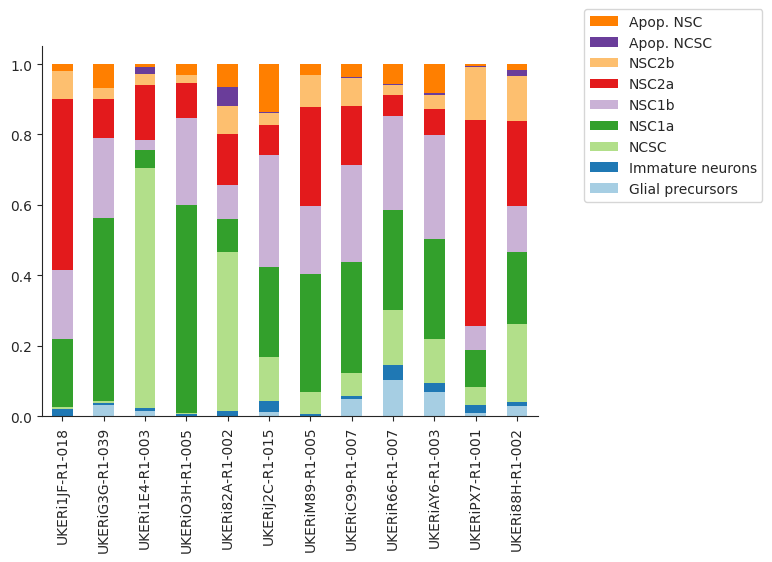

In [15]:
ax = pd.crosstab(adata.obs['Donor'], adata.obs['cell_types'], normalize=0).plot(kind='bar', stacked=True, legend=False, color=col6, edgecolor='none')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.08,1.12,0,0), ncol=1)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.xlabel('')
plt.savefig('hp_NPCs/figures/Composition/cell_types_Donor_celltype_composition.pdf', bbox_inches='tight')

plt.show()

In [16]:
col_donors = adata.uns['Donor_colors']

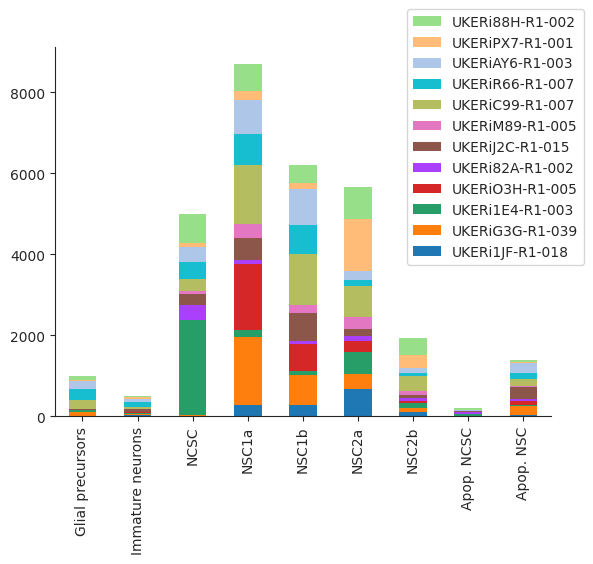

In [17]:
ax = pd.crosstab(adata.obs['cell_types'], adata.obs['Donor'], normalize=False).plot(kind='bar', stacked=True, legend=False, color=col_donors, edgecolor='none')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.08,1.12,0,0), ncol=1)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.grid(False)
plt.xlabel('')
plt.savefig('hp_NPCs/figures/Composition/cell_types_Celltype_donor_composition_unnormalized.pdf', bbox_inches='tight')
plt.show()

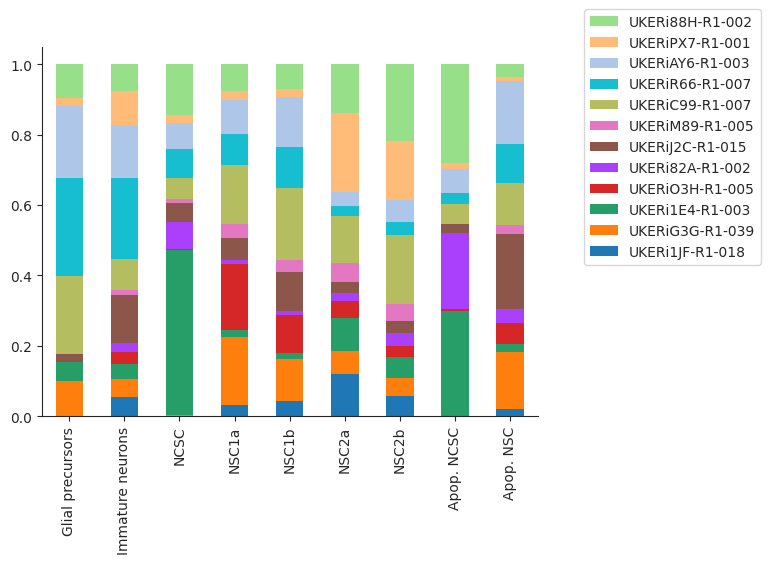

In [18]:
ax = pd.crosstab(adata.obs['cell_types'], adata.obs['Donor'], normalize=0).plot(kind='bar', stacked=True, legend=False, color=col_donors, edgecolor='none')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.08,1.12,0,0), ncol=1)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.grid(False)
plt.xlabel('')
plt.savefig('hp_NPCs/figures/Composition/cell_types_Celltype_donor_composition.pdf', bbox_inches='tight')
plt.show()

In [19]:
col_condition = adata.uns['condition_colors']

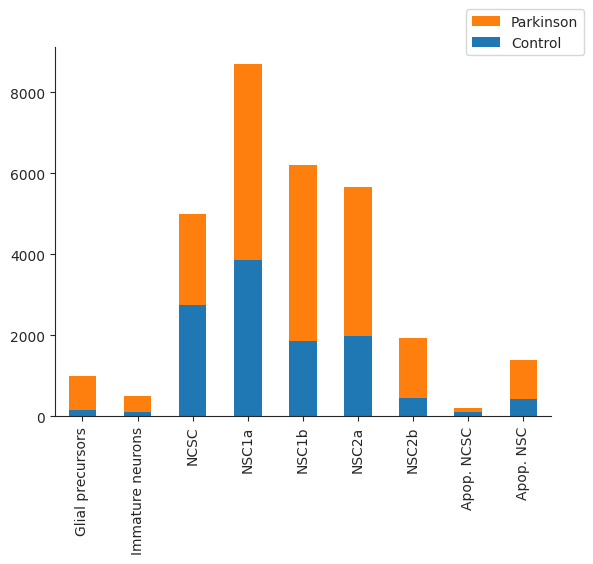

In [20]:
ax = pd.crosstab(adata.obs['cell_types'], adata.obs['condition'], normalize=False).plot(kind='bar', stacked=True, legend=False, color=col_condition, edgecolor='none')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.08,1.12,0,0), ncol=1)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.grid(False)
plt.xlabel('')
plt.savefig('hp_NPCs/figures/Composition/cell_types_Celltype_condition_composition_unnormalized.pdf', bbox_inches='tight')
plt.show()

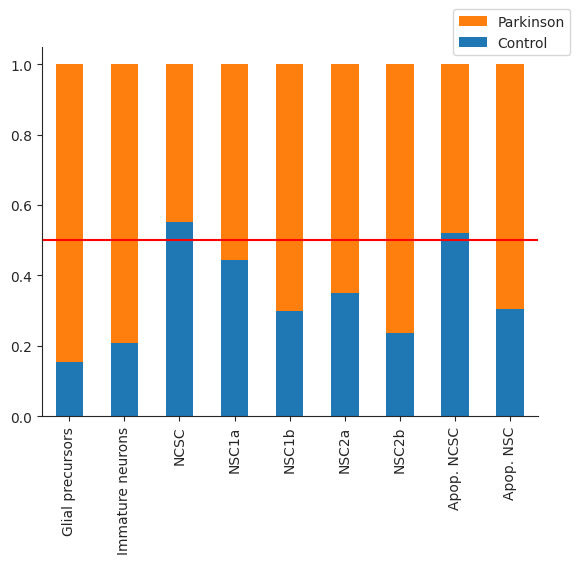

In [21]:
ax = pd.crosstab(adata.obs['cell_types'], adata.obs['condition'], normalize=0).plot(kind='bar', stacked=True, legend=False, color=col_condition, edgecolor='none')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.08,1.12,0,0), ncol=1)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.grid(False)
plt.xlabel('')
plt.axhline(y=0.5, color='r', linestyle='-')
plt.savefig('hp_NPCs/figures/Composition/cell_types_Celltype_condition_composition.pdf', bbox_inches='tight')
plt.show()

## Run interference

In [22]:
sccoda_data_mod = sccoda_model.prepare(
    sccoda_data,
    modality_key="coda",
    formula="condition",
    reference_cell_type="automatic",
)
sccoda_model.run_nuts(sccoda_data_mod, modality_key="coda", rng_key=1234)

Automatic reference selection! Reference cell type set to Immature neurons

Zero counts encountered in data! Added a pseudocount of 0.5.

sample: 100%|█████████████████████████| 11000/11000 [24:46<00:00,  7.40it/s, 127 steps of size 4.33e-02. acc. prob=0.78]


In [23]:
sccoda_data["coda"].varm["effect_df_condition[T.Parkinson]"]

,Final Parameter,HDI 3%,HDI 97%,SD,Inclusion probability,Expected Sample,log2-fold change
Cell Type,,,,,,,
Glial precursors,0.0,-0.312,1.178,0.341,0.5461,85.371393,0.0
Immature neurons,0.0,0.000,0.000,0.000,0.0000,121.390312,0.0
NCSC,0.0,-0.144,1.467,0.470,0.6981,195.392640,0.0
NSC1a,0.0,-0.340,0.781,0.225,0.4815,656.558022,0.0
NSC1b,0.0,-0.230,0.979,0.296,0.5523,488.828186,0.0
NSC2a,0.0,-0.490,0.557,0.174,0.4291,521.136014,0.0
NSC2b,0.0,-0.426,0.761,0.227,0.4753,234.395784,0.0
Apop. NCSC,0.0,-0.610,0.703,0.226,0.4776,63.944216,0.0
Apop. NSC,0.0,-0.529,0.628,0.203,0.4668,179.650100,0.0


## Select credible effects

The false discovery rate (FDR) was increased to 0.2.

In [24]:
sccoda_model.set_fdr(sccoda_data_mod, 0.2)

In [25]:
sccoda_model.credible_effects(sccoda_data_mod, modality_key="coda")

Covariate               Cell Type       
condition[T.Parkinson]  Glial precursors    False
                        Immature neurons    False
                        NCSC                False
                        NSC1a               False
                        NSC1b               False
                        NSC2a               False
                        NSC2b               False
                        Apop. NCSC          False
                        Apop. NSC           False
Name: Final Parameter, dtype: bool

## Variation of the reference cell type

In [26]:
# Run scCODA with each cell type as the reference
cell_types = adata.obs.cell_types.cat.categories
results_cycle = pd.DataFrame(index=cell_types, columns=["times_credible"]).fillna(0)

for ct in cell_types:
    print(f"Reference: {ct}")

    # Run inference
    model_temp = sccoda_model.prepare(
    sccoda_data,
    modality_key="coda",
    formula="condition",
    reference_cell_type=ct,
    )
    sccoda_model.run_nuts(model_temp, modality_key="coda", rng_key=1234)
    
    # Select credible effects
    sccoda_model.set_fdr(model_temp, 0.2)
    cred_eff = sccoda_model.credible_effects(model_temp, modality_key="coda")
    cred_eff.index = cred_eff.index.droplevel(level=0)

    # add up credible effects
    results_cycle["times_credible"] += cred_eff.astype("int")

Reference: Glial precursors


sample: 100%|██████████████████████████| 11000/11000 [13:56<00:00, 13.15it/s, 63 steps of size 6.50e-02. acc. prob=0.70]


Reference: Immature neurons


sample: 100%|█████████████████████████| 11000/11000 [23:32<00:00,  7.79it/s, 127 steps of size 4.33e-02. acc. prob=0.78]


Reference: NCSC


sample: 100%|██████████████████████████| 11000/11000 [17:05<00:00, 10.73it/s, 63 steps of size 5.95e-02. acc. prob=0.81]


Reference: NSC1a


sample: 100%|█████████████████████████| 11000/11000 [30:38<00:00,  5.98it/s, 127 steps of size 4.02e-02. acc. prob=0.82]


Reference: NSC1b


sample: 100%|██████████████████████████| 11000/11000 [18:28<00:00,  9.92it/s, 63 steps of size 6.23e-02. acc. prob=0.74]


Reference: NSC2a


sample: 100%|█████████████████████████| 11000/11000 [26:24<00:00,  6.94it/s, 127 steps of size 4.47e-02. acc. prob=0.79]


Reference: NSC2b


sample: 100%|██████████████████████████| 11000/11000 [16:34<00:00, 11.06it/s, 63 steps of size 7.02e-02. acc. prob=0.64]


Reference: Apop. NCSC


sample: 100%|█████████████████████████| 11000/11000 [28:57<00:00,  6.33it/s, 127 steps of size 4.00e-02. acc. prob=0.80]


Reference: Apop. NSC


sample: 100%|██████████████████████████| 11000/11000 [19:31<00:00,  9.39it/s, 63 steps of size 5.01e-02. acc. prob=0.77]


In [27]:
# Calculate percentages
results_cycle["pct_credible"] = results_cycle["times_credible"]/len(cell_types)
results_cycle["is_credible"] = results_cycle["pct_credible"] > 0.5
print(results_cycle)



                  times_credible  pct_credible  is_credible
Glial precursors               0           0.0        False
Immature neurons               0           0.0        False
NCSC                           0           0.0        False
NSC1a                          0           0.0        False
NSC1b                          0           0.0        False
NSC2a                          0           0.0        False
NSC2b                          0           0.0        False
Apop. NCSC                     0           0.0        False
Apop. NSC                      0           0.0        False


## Visualize fold change

In [28]:
pt.pl.coda.effects_barplot(sccoda_data_mod, modality_key="coda", covariates="condition")
plt.savefig('hp_NPCs/figures/Composition/cell_types_Celltype_composition_log2fc.pdf', bbox_inches='tight')
plt.show()

ValueError: Number of columns must be a positive integer, not 0

<Figure size 0x300 with 0 Axes>